# Régressions linéaires avec Statsmodels et Scikit-Learn

On peut réaliser des régressions linéaires de beaucoup de manières avec Python. 
On en a retenu 2, statsmodels et scikit-learn. Les deux librairies ont chacunes leurs qualités et leurs défauts, sachez que l'une est plus orienté data science et l'autre plus pour des économistes. 

(inspiré de la page [Linear Regression with Statsmodels and Scikit-Learn](http://marcharper.codes/2016-06-14/Linear+Regression+with+Statsmodels+and+Scikit-Learn.html))

Par exemple, statsmodel vous fournira directement le tableau de regression, pour scikit c'est moins immédiat 
On commence par charger tous les packages qui vont servir dans ce notebook : 

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

c:\Python36_x64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


On va utiliser la fameuse base des Iris qu'on peut appeler depuis la librairie seaborn.
Pour chaque fleur, on a des informations sur la longueur et largeur de ses sépales ainsi que de ses pétales.

Pour comprendre la différence en image : [Sépale](http://idao.cirad.fr/content/adventoi/defs/235_fr.html).

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


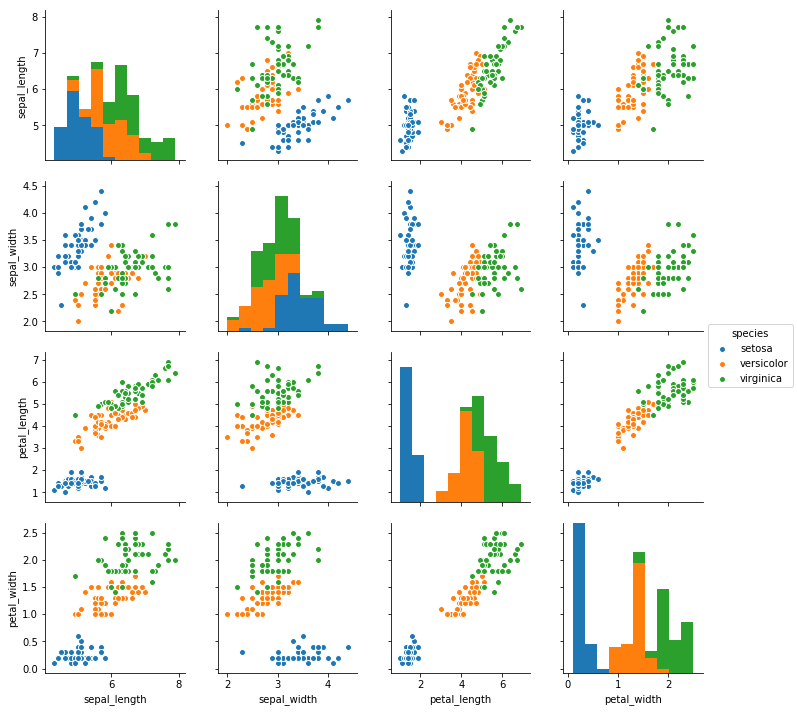

In [4]:
sns.pairplot(iris, hue="species");

Grâce à ces graphiques, on observere une forte relation entre longeur et la largeur des pétales. 
On réalise une regression à une variable entre la longueur et la largeur grâce à seaborn. 

## Regression à une variable avec seaborn

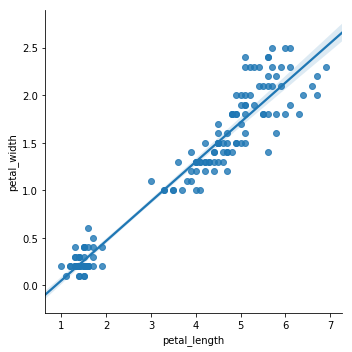

In [5]:
sns.lmplot(x="petal_length", y="petal_width", data=iris);

Si on observe bien qu'une relation existe, on ne connait pas grand chose d'autre. 

## Regression en utilisant scikit-learn

In [6]:
X = iris[["petal_length"]]
y = iris["petal_width"]

# On fit le modele
model = linear_model.LinearRegression()
results = model.fit(X, y)

In [7]:
print(results.intercept_, results.coef_)

-0.363075521319 [ 0.41575542]


La meilleure approximation linéaire est donc y=a+bx avec 
- a=−0.363075521319
- b=0.41575542

Mais en termes de présentation de résultats, c'est un peu limité... Pas de standard errors, pas de $R^2$ etc (du moins pas automatiquement) 

## Regression en utilisant statsmodels

Remarque : on invese X et y dans la spécification du modèle pour cette librairie. 

In [8]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4417.
Date:                Sun, 24 Sep 2017   Prob (F-statistic):          1.22e-112
Time:                        20:12:37   Log-Likelihood:                -8.7179
No. Observations:                 150   AIC:                             19.44
Df Residuals:                     149   BIC:                             22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.3365      0.005     66.463   

Si vous regardez de plus près, vous observez que les coefficients des deux régressions sont proches mais pas égaux. Problème de précision ? Non...

Il faut faire attention avec statsmodels, il n'inclut pas de lui-même un intercept ($\beta_0$) alors que scikit learn le fait. 

In [9]:
X = iris["petal_length"]
X = np.vander(X, 2) #ici on ajoute
y = iris["petal_width"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sun, 24 Sep 2017   Prob (F-statistic):           4.68e-86
Time:                        20:12:37   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4158      0.010     43.387      0.0

Ca y est, les coefficients de scikit et de statsmodels sont quasi identiques (en réalité si vous regardez après la 10ème décimale, ils sont légèrement différents...)

Si on regadre le $R^2$, on se dit qu'on est plutôt pas mal pour cette régression (en même temps, dire que pour un iris, la longueur et la largeur du pétale sont corrélées, c'est un peu normal...)'

Mais voyons si on peut aller encore plus loin, par exemple, en ajoutant l'information de l'espèce de l'iris, avec des variables catégorielles (qu'on ajoutera sous la forme d'indicatries ou dummies)

In [10]:
dummies = pd.get_dummies(iris["species"])
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


## La regression multi-linéaire avec statsmodels

In [11]:
X = iris[["petal_length", "setosa", "versicolor", "virginica"]]
X = sm.add_constant(X) # une autre façons d'ajouter une constante 
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sun, 24 Sep 2017   Prob (F-statistic):           4.88e-92
Time:                        20:12:38   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2501      0.098      2.561   

Avec cette version, on s'améliore en termes de $R^2$ mais la précision de notre estimateur est plus faible...

Pour aller plus loin, de nombreux exemples sont disponibles là : 
    
- [OLS](http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)
- [GLS](http://www.statsmodels.org/dev/examples/notebooks/generated/gls.html)
- [Regression quantile](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html)